<a href="https://colab.research.google.com/github/yenee/0320/blob/main/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 安裝套件

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns

### 下載中文字體

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

### 讀入檔案

In [27]:
df1 = pd.read_csv('/content/sample_data/direct_supply_data.csv')
print(df1.columns)
df1.head(5)

Index(['年份', '出售單位', '發電案場', '購買者', '憑證種類', '供電種類', '憑證張數'], dtype='object')


,年份,出售單位,發電案場,購買者,憑證種類,供電種類,憑證張數
0,2024,中威風力發電股份有限公司,台中風場,台灣積體電路製造股份有限公司,風力能,轉供,28559
1,2024,中租電力科技股份有限公司,帝寶工業新營廠房屋頂太陽光電發電廠,中租迪和股份有限公司,太陽能,轉供,208
2,2024,中鋼光能股份有限公司,中鋼成品倉庫07庫&amp;條線工場08庫,中國鋼鐵股份有限公司,太陽能,併網型直供,627
3,2024,中鋼光能股份有限公司,中鋼鋼板工場#02#03庫,中國鋼鐵股份有限公司,太陽能,併網型直供,451
4,2024,中鋼光能股份有限公司,中鋼#09~#11條鋼工廠,中國鋼鐵股份有限公司,太陽能,併網型直供,326


In [28]:
df2 = pd.read_csv('/content/sample_data/民營再生能源發電廠 - 工作表1.csv')
print(df2.columns)
df2.head(5)

Index(['公司名稱', '發電廠名稱', '所在縣市', '機組(座)', '裝置容量(瓩)', '商轉年度', '類別'], dtype='object')


,公司名稱,發電廠名稱,所在縣市,機組(座),裝置容量(瓩),商轉年度,類別
0,嘉南實業股份有限公司,烏山頭水力發電廠,臺南市官田區,NaN,"8,750",91,水力發電
1,嘉南實業股份有限公司,西口水力發電廠,臺南市官田區,NaN,"11,520",96,水力發電
2,嘉南實業股份有限公司,八田水力發電廠,臺南市官田區,NaN,"2,196",106,水力發電
3,名間電力股份有限公司,名間水力發電廠,南投縣名間鄉,NaN,"16,704",97,水力發電
4,聚電企業開發股份有限公司,卑南小水力發電廠,臺東縣卑南鄉,NaN,"1,980",93,水力發電


### 各年度交易憑證趨勢圖

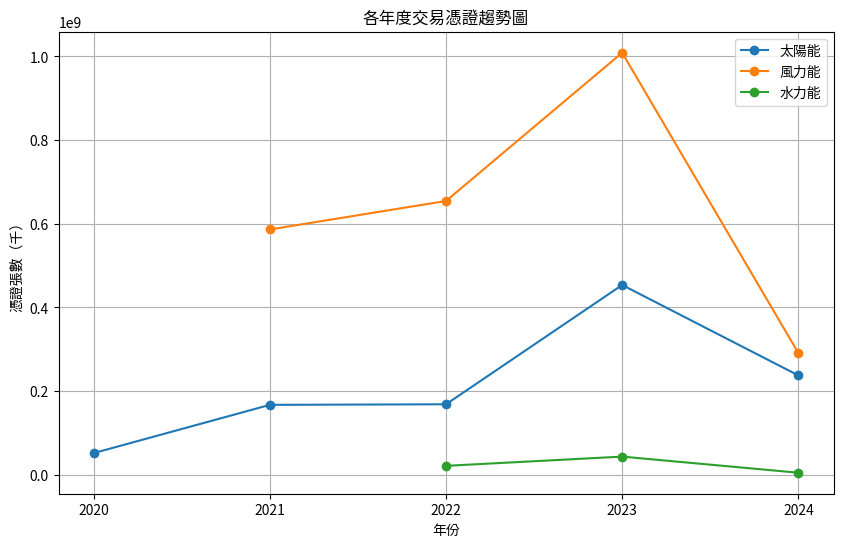

In [15]:
summary_grouped = df1.groupby(['年份', '憑證種類'])['憑證張數'].sum()
summary_df = summary_grouped.reset_index()

plt.figure(figsize=(10, 6))

for cert_type in summary_df['憑證種類'].unique():
    cert_type_data = summary_df[summary_df['憑證種類'] == cert_type]
    plt.plot(cert_type_data['年份'].astype(str), cert_type_data['憑證張數'] * 1000, marker='o', label=cert_type)

plt.legend()
plt.xlabel('年份')
plt.ylabel('憑證張數（千）')
plt.title('各年度交易憑證趨勢圖')

plt.grid(True)
plt.show()

### 各年度交易憑證圓餅圖

<ipython-input-19-325efc6a6aef>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Accent')


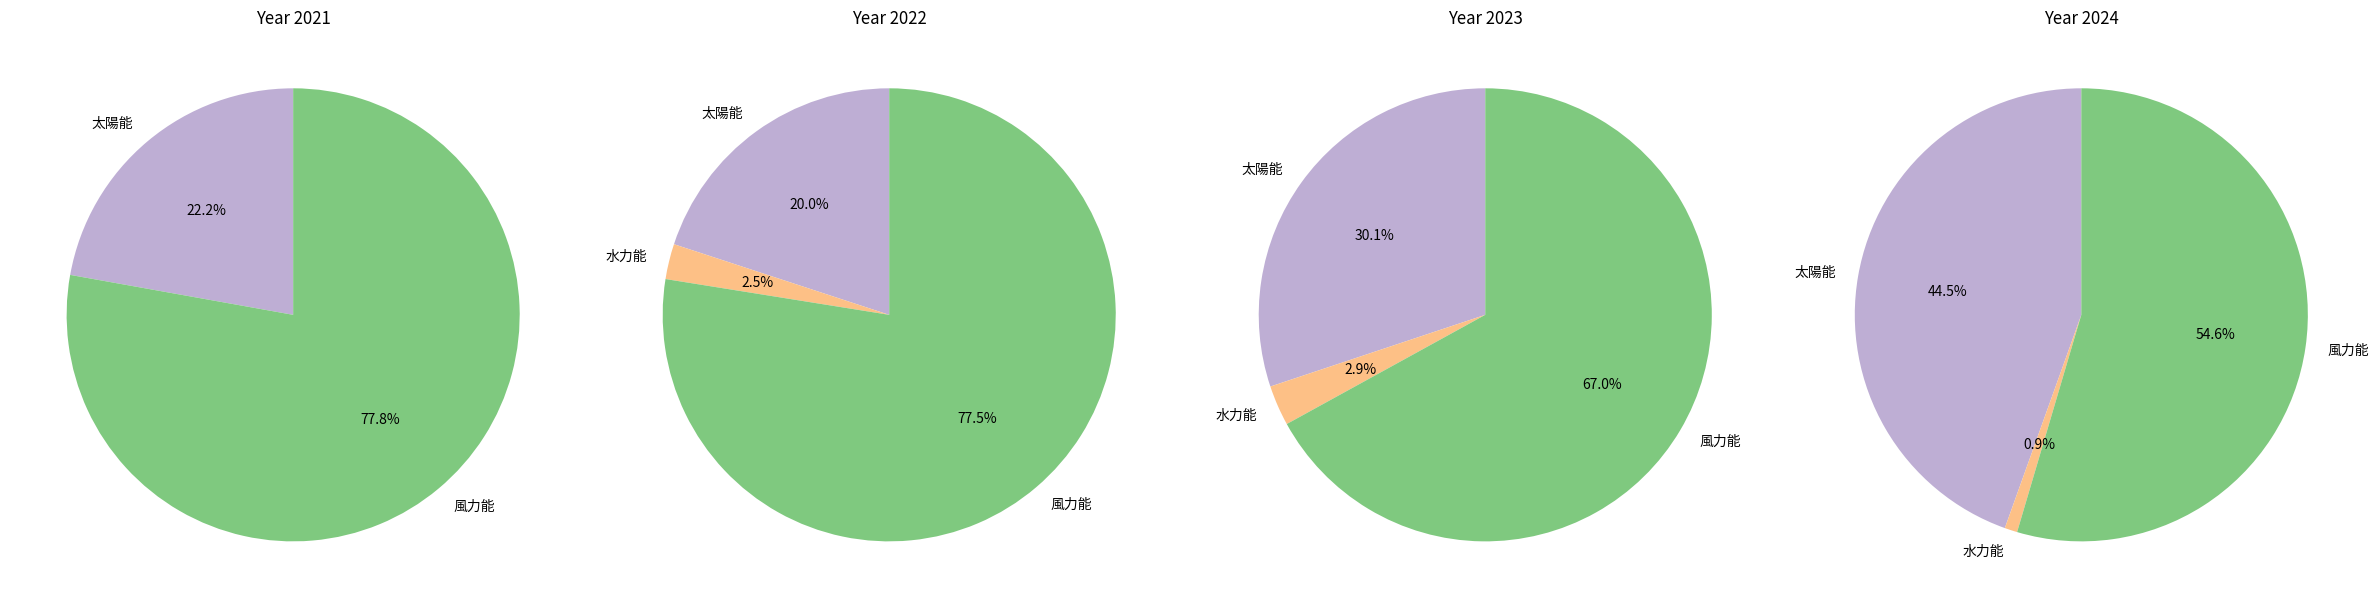

In [19]:
cert_types = df1['憑證種類'].unique()
cmap = cm.get_cmap('Accent')
colors = [cmap(i) for i in range(len(cert_types))]
cert_color_map = dict(zip(cert_types, colors))
summary_grouped = df1.groupby(['年份', '憑證種類'])['憑證張數'].sum()
years = summary_grouped.index.levels[0].drop(2020)
fig, axes = plt.subplots(1, len(years), figsize=(len(years) * 6, 6))

for i, year in enumerate(years):
    ax = axes[i]
    year_data = summary_grouped.loc[year]
    cert_types = year_data.index
    cert_colors = [cert_color_map[cert_type] for cert_type in cert_types]
    ax.pie(year_data, labels=cert_types, autopct='%1.1f%%', startangle=90, colors=cert_colors)
    ax.set_title(f'Year {year}')

plt.tight_layout()
plt.show()


### 出售憑證最多的十個能源公司

<ipython-input-33-afc106549fa7>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Accent')


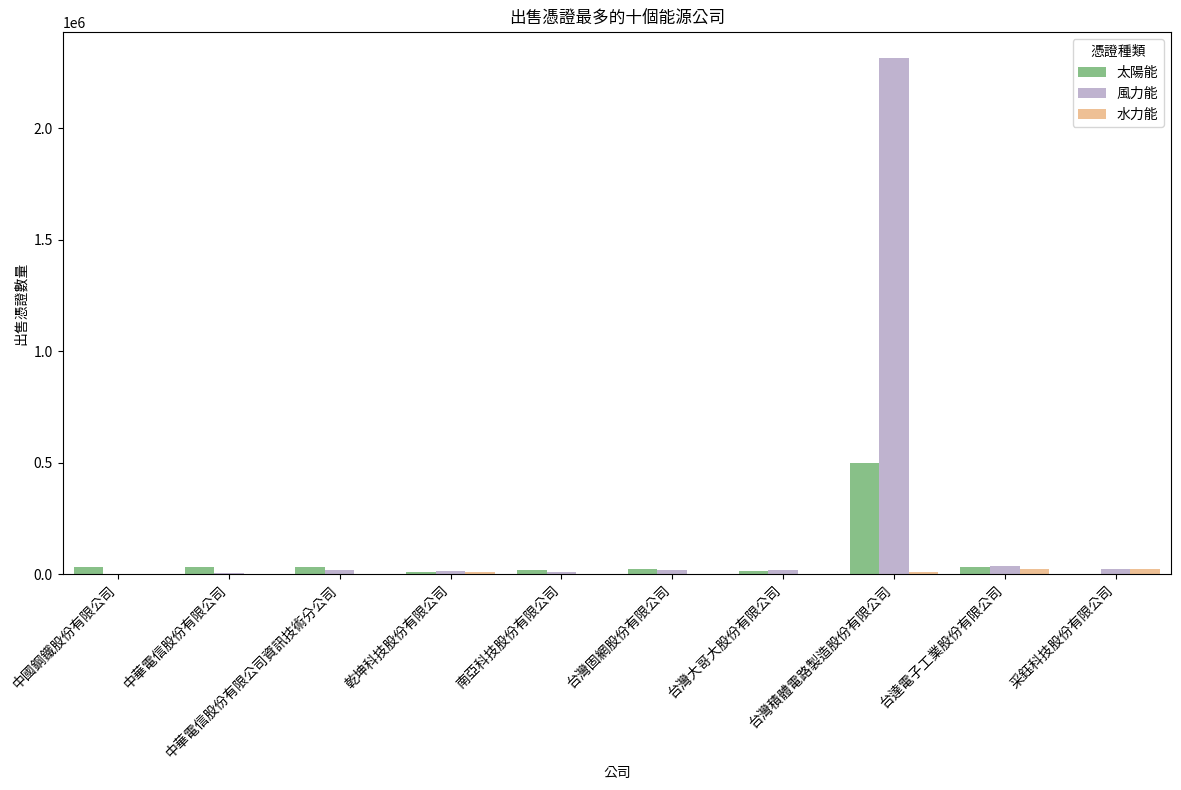

In [33]:
cmap = cm.get_cmap('Accent')
colors = [cmap(i) for i in range(len(cert_types))]
cert_color_map = dict(zip(cert_types, colors))
sale_cert_counts = df1.groupby(['購買者', '憑證種類'])['憑證張數'].sum().reset_index()
top_10_companies = sale_cert_counts.groupby('購買者')['憑證張數'].sum().nlargest(10).index
plt.figure(figsize=(12, 8))
sns.barplot(data=sale_cert_counts[sale_cert_counts['購買者'].isin(top_10_companies)],
            x='購買者', y='憑證張數', hue='憑證種類', palette=cert_color_map.values())
plt.title('出售憑證最多的十個能源公司')
plt.xlabel('公司')
plt.ylabel('出售憑證數量')
plt.xticks(rotation=45, ha='right')
plt.legend(title='憑證種類')
plt.tight_layout()
plt.show()


### 在不同憑證種類下購賣公司台積電VS其他

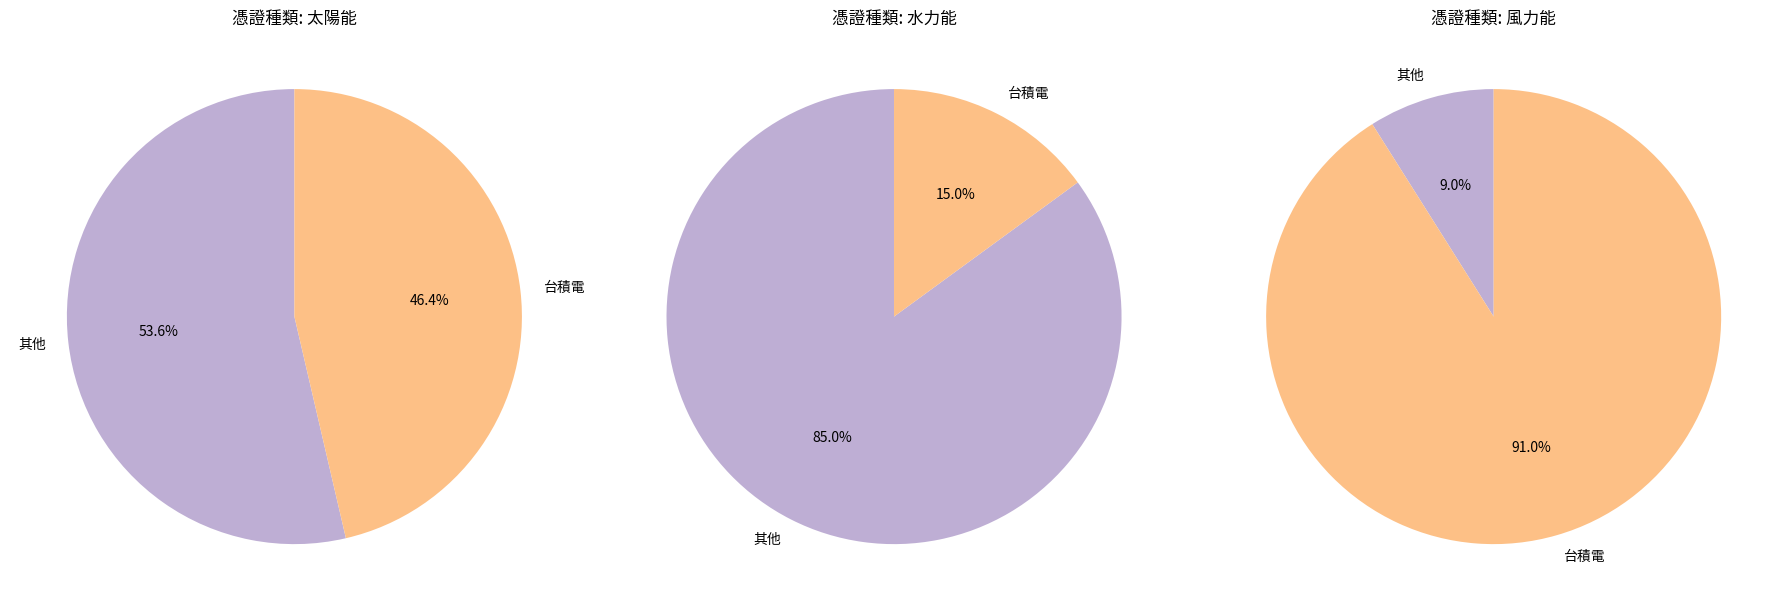

In [47]:
df1['Is_TSMC'] = df1['購買者'].apply(lambda x: '台積電' if '台灣積體電路製造股份有限公司' in x else '其他')
cert_sales = df1.groupby(['憑證種類', 'Is_TSMC'])['憑證張數'].sum().reset_index()
cert_types = cert_sales['憑證種類'].unique()
num_plots = len(cert_types)
fig, axes = plt.subplots(1, num_plots, figsize=(6*num_plots, 6))
for i, cert_type in enumerate(cert_types):
    cert_type_data = cert_sales[cert_sales['憑證種類'] == cert_type]
    ax = axes[i]
    ax.pie(cert_type_data['憑證張數'], labels=cert_type_data['Is_TSMC'], autopct='%1.1f%%', startangle=90, colors=cert_colors)
    ax.set_title(f'憑證種類: {cert_type}')

plt.tight_layout()
plt.show()